# Synthetic Data Examples: Time Series & Classification

1. Time series analysis (with ARIMA forecasting)
2. Classification (with Logistic Regression)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from statsmodels.tsa.arima.model import ARIMA

# For inline plotting in Jupyter
%matplotlib inline

## 1. Synthetic Time Series Data for Sales

We generate a daily time series with a seasonal pattern, a trend, and random noise.
Then, we fit an ARIMA(2, 1, 2) model and forecast the next 30 days.

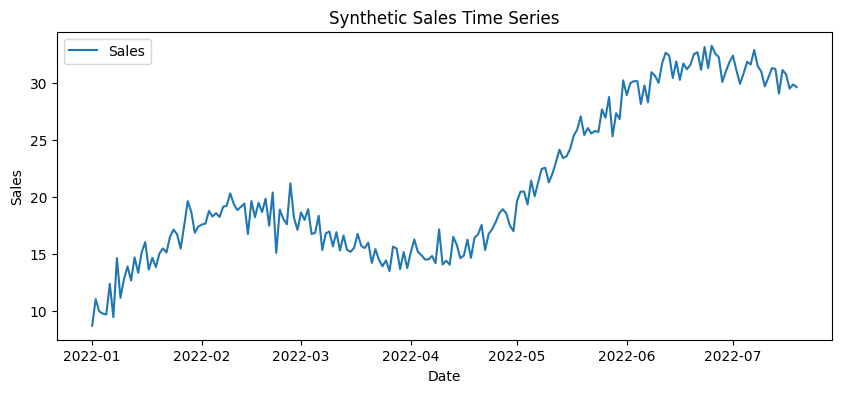

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


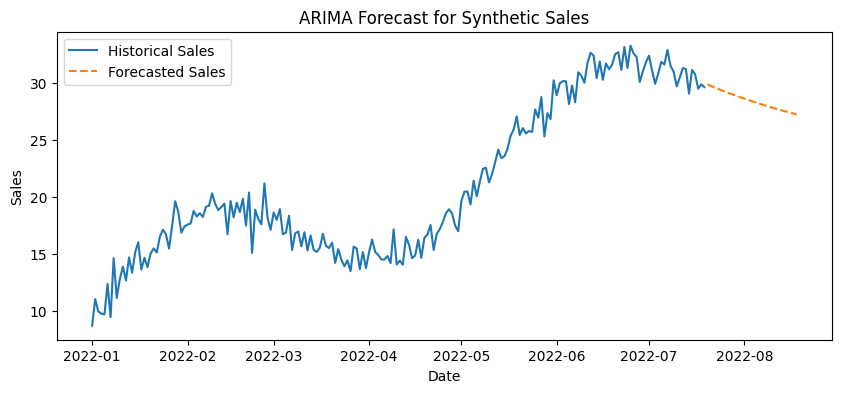

In [2]:
# Generate date range
dates = pd.date_range(start='2022-01-01', periods=200, freq='D')

# Create seasonal pattern, trend, and noise
seasonal = 10 + 5 * np.sin(np.linspace(0, 3 * np.pi, 200))
trend = 0.1 * np.arange(200)
noise = np.random.normal(0, 1, size=200)
sales = seasonal + trend + noise

# Build DataFrame
ts_df = pd.DataFrame({'Date': dates, 'Sales': sales})
ts_df.set_index('Date', inplace=True)

# Plot the series
plt.figure(figsize=(10, 4))
plt.plot(ts_df.index, ts_df['Sales'], label='Sales')
plt.title('Synthetic Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Fit ARIMA model and forecast
model = ARIMA(ts_df['Sales'], order=(2, 1, 2))
model_fit = model.fit()
forecast = model_fit.get_forecast(steps=30)
forecast_index = pd.date_range(start=ts_df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
forecast_df = forecast.predicted_mean
forecast_df.index = forecast_index

# Plot historical vs. forecasted
plt.figure(figsize=(10, 4))
plt.plot(ts_df.index, ts_df['Sales'], label='Historical Sales')
plt.plot(forecast_df.index, forecast_df, label='Forecasted Sales', linestyle='--')
plt.title('ARIMA Forecast for Synthetic Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

## 2. Synthetic Classification Data for Logistic Regression

We generate a synthetic binary classification dataset with 10 features, split into
training and test sets, train a Logistic Regression model, and evaluate its performance.

In [3]:
# Generate synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=10,
                           n_informative=5, n_redundant=2,
                           n_classes=2, random_state=42)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)

# Train logistic regression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])

# Display results
print(f"Accuracy: {accuracy:.4f}\n")
print('Confusion Matrix:')
print(conf_mat)
print('\nClassification Report:')
print(class_report)

Accuracy: 0.8350

Confusion Matrix:
[[95 17]
 [16 72]]

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.86      0.85      0.85       112
     Class 1       0.81      0.82      0.81        88

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.84      0.83      0.84       200

